In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns
import joblib


In [2]:
df = pd.read_csv('segmentada.csv')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())

         d8        d5        d7        d0        x8        x5        x7  \
0  0.002534  0.054895  0.041522  0.057841 -0.069561 -0.012329 -0.113641   
1  0.002241  0.082535  0.035515  0.079078 -0.070179  0.005430 -0.088333   
2  0.071195  0.300494  0.111925  0.136287 -0.005589  0.237707 -0.017873   
3  0.151984  0.158136  0.166274  0.125265 -0.033199 -0.153598  0.018912   
4  0.196612  0.089259  0.147832  0.119468 -0.029745  0.032694  0.093026   

         x0        m8        m5  ...        d2        x9      x0.1      x8.1  \
0 -0.021926 -0.069225 -0.042910  ...  0.006265 -0.069161 -0.000391 -0.069902   
1 -0.055264 -0.070389 -0.055693  ...  0.009458 -0.074414  0.006989 -0.087719   
2  0.090340 -0.009867  0.238795  ...  0.210151 -0.002957  0.030859  0.001466   
3 -0.136506 -0.030836 -0.063219  ...  0.078567 -0.054199 -0.039953 -0.008080   
4 -0.027950 -0.083515  0.004362  ...  0.195842 -0.005517  0.007372 -0.048129   

         x2        m9      m0.1      m8.1        m2  target  
0 -0.0

In [3]:
X_train,X_test,y_train ,y_test=train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=42, stratify=df['target'])

In [4]:
conteo_clases = y_train.value_counts().to_dict()
print(conteo_clases)
conteo_clases = y_test.value_counts().to_dict()
print(conteo_clases)

{0.0: 42, 1.0: 36}
{0.0: 11, 1.0: 9}


c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sigal\anaconda3\envs\EEG\Lib\site-packages\sklearn\linea

Training Accuracy: 0.9615384615384616
Accuracy Score: 0.9

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        11
         1.0       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



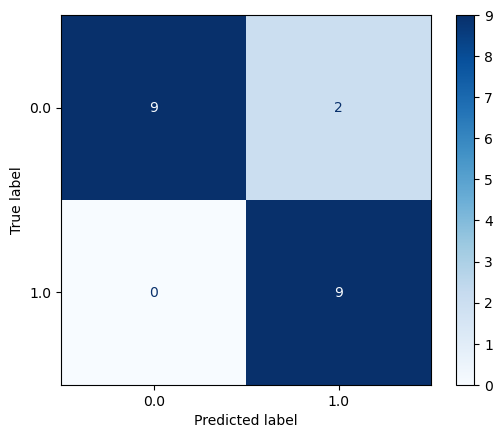

In [5]:
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('logistic', LogisticRegression())  
])
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # Parametro de regularización
    'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Optimizador
    'logistic__penalty': ['l2'],
    #'logistic__fit_intercept':[True,False]
}

lr_grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# Busqueda de las mejores caracteristicas para el clasificado
lr_grid.fit(X_train, y_train)
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('svc', SVC(probability=True))  
])
param_grid = {
    'svc__C': [0.1, 1, 10, 100],               # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],   # Type of kernel
    'svc__gamma': ['scale', 'auto'],            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'svc__degree': [2, 3, 4],                   # Degree of the polynomial kernel function (if 'poly')
    'svc__coef0': [0.0, 0.1, 0.5],              # Independent term in kernel function (for 'poly' and 'sigmoid')
}

svm_grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# Busqueda de las mejores caracteristicas para el clasificado
svm_grid.fit(X_train, y_train)
"""
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('forest', RandomForestClassifier())  
])

param_grid = {
    'forest__n_estimators': [50, 100, 200],  
    'forest__max_depth': [None, 10, 20, 30], 
    'forest__min_samples_split': [2, 5, 10],  
    'forest__min_samples_leaf': [1, 2, 4],  
    'forest__bootstrap': [True, False]  
}

rf_grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
"""
rfff=joblib.load( "rf_pipeline_2.pkl")
voting_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('voting', VotingClassifier(estimators=[
        ('lr', lr_grid.best_estimator_),
        ('svm', svm_grid.best_estimator_),
        ('rf', rfff)
    ], voting='soft'))
])

voting_pipeline.fit(X_train, y_train)
best_pipeline = voting_pipeline
y_pred = best_pipeline.predict(X_test)
y_train_pred = best_pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [6]:
joblib.dump(best_pipeline, 'vot_pipeline_2.pkl')


['vot_pipeline_2.pkl']